In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import string
from matplotlib import gridspec

import time
import pickle

import memory_profiler

%load_ext memory_profiler

from pathlib import Path

In [2]:
mpl.__version__

'3.5.1'

In [3]:
import black
import jupyter_black

jupyter_black.load(line_length=79)

In [4]:
%load_ext autoreload
%autoreload 2

from pubmed_landscape_src.plotting import *

In [5]:
variables_path = Path("../../results/variables/bert-models")
figures_path = Path("../../results/figures")
berenslab_data_path = Path(
    "/gpfs01/berens/data/data/pubmed_processed/embeddings/embeddings_luca"
)

In [6]:
plt.style.use("../matplotlib_style.txt")

# Fig S8: t-SNE embeddings of a subset of the PubMed dataset based on different representations.

In [7]:
# Import
df = pd.read_pickle(
    "/gpfs01/berens/data/data/pubmed_processed/df_labeled_papers_subset"
)
df = df.reset_index(drop=True)
colors = df["Colors"].to_numpy()

In [8]:
dict_accuracies = {
    "tfidf": [61.0, 54.8, 49.9],
    "bert": [57.1, 46.0],
    "scibert": [62.1, 52.3],
    "biobert": [65.0, 56.5],
    "pubmedbert": [67.7, 60.8],
    "sbert": [64.5, 60.2],
    "specter": [64.7, 59.3],
    "scincl": [65.0, 60.7],
    "simcse": [57.0, 46.9],
}

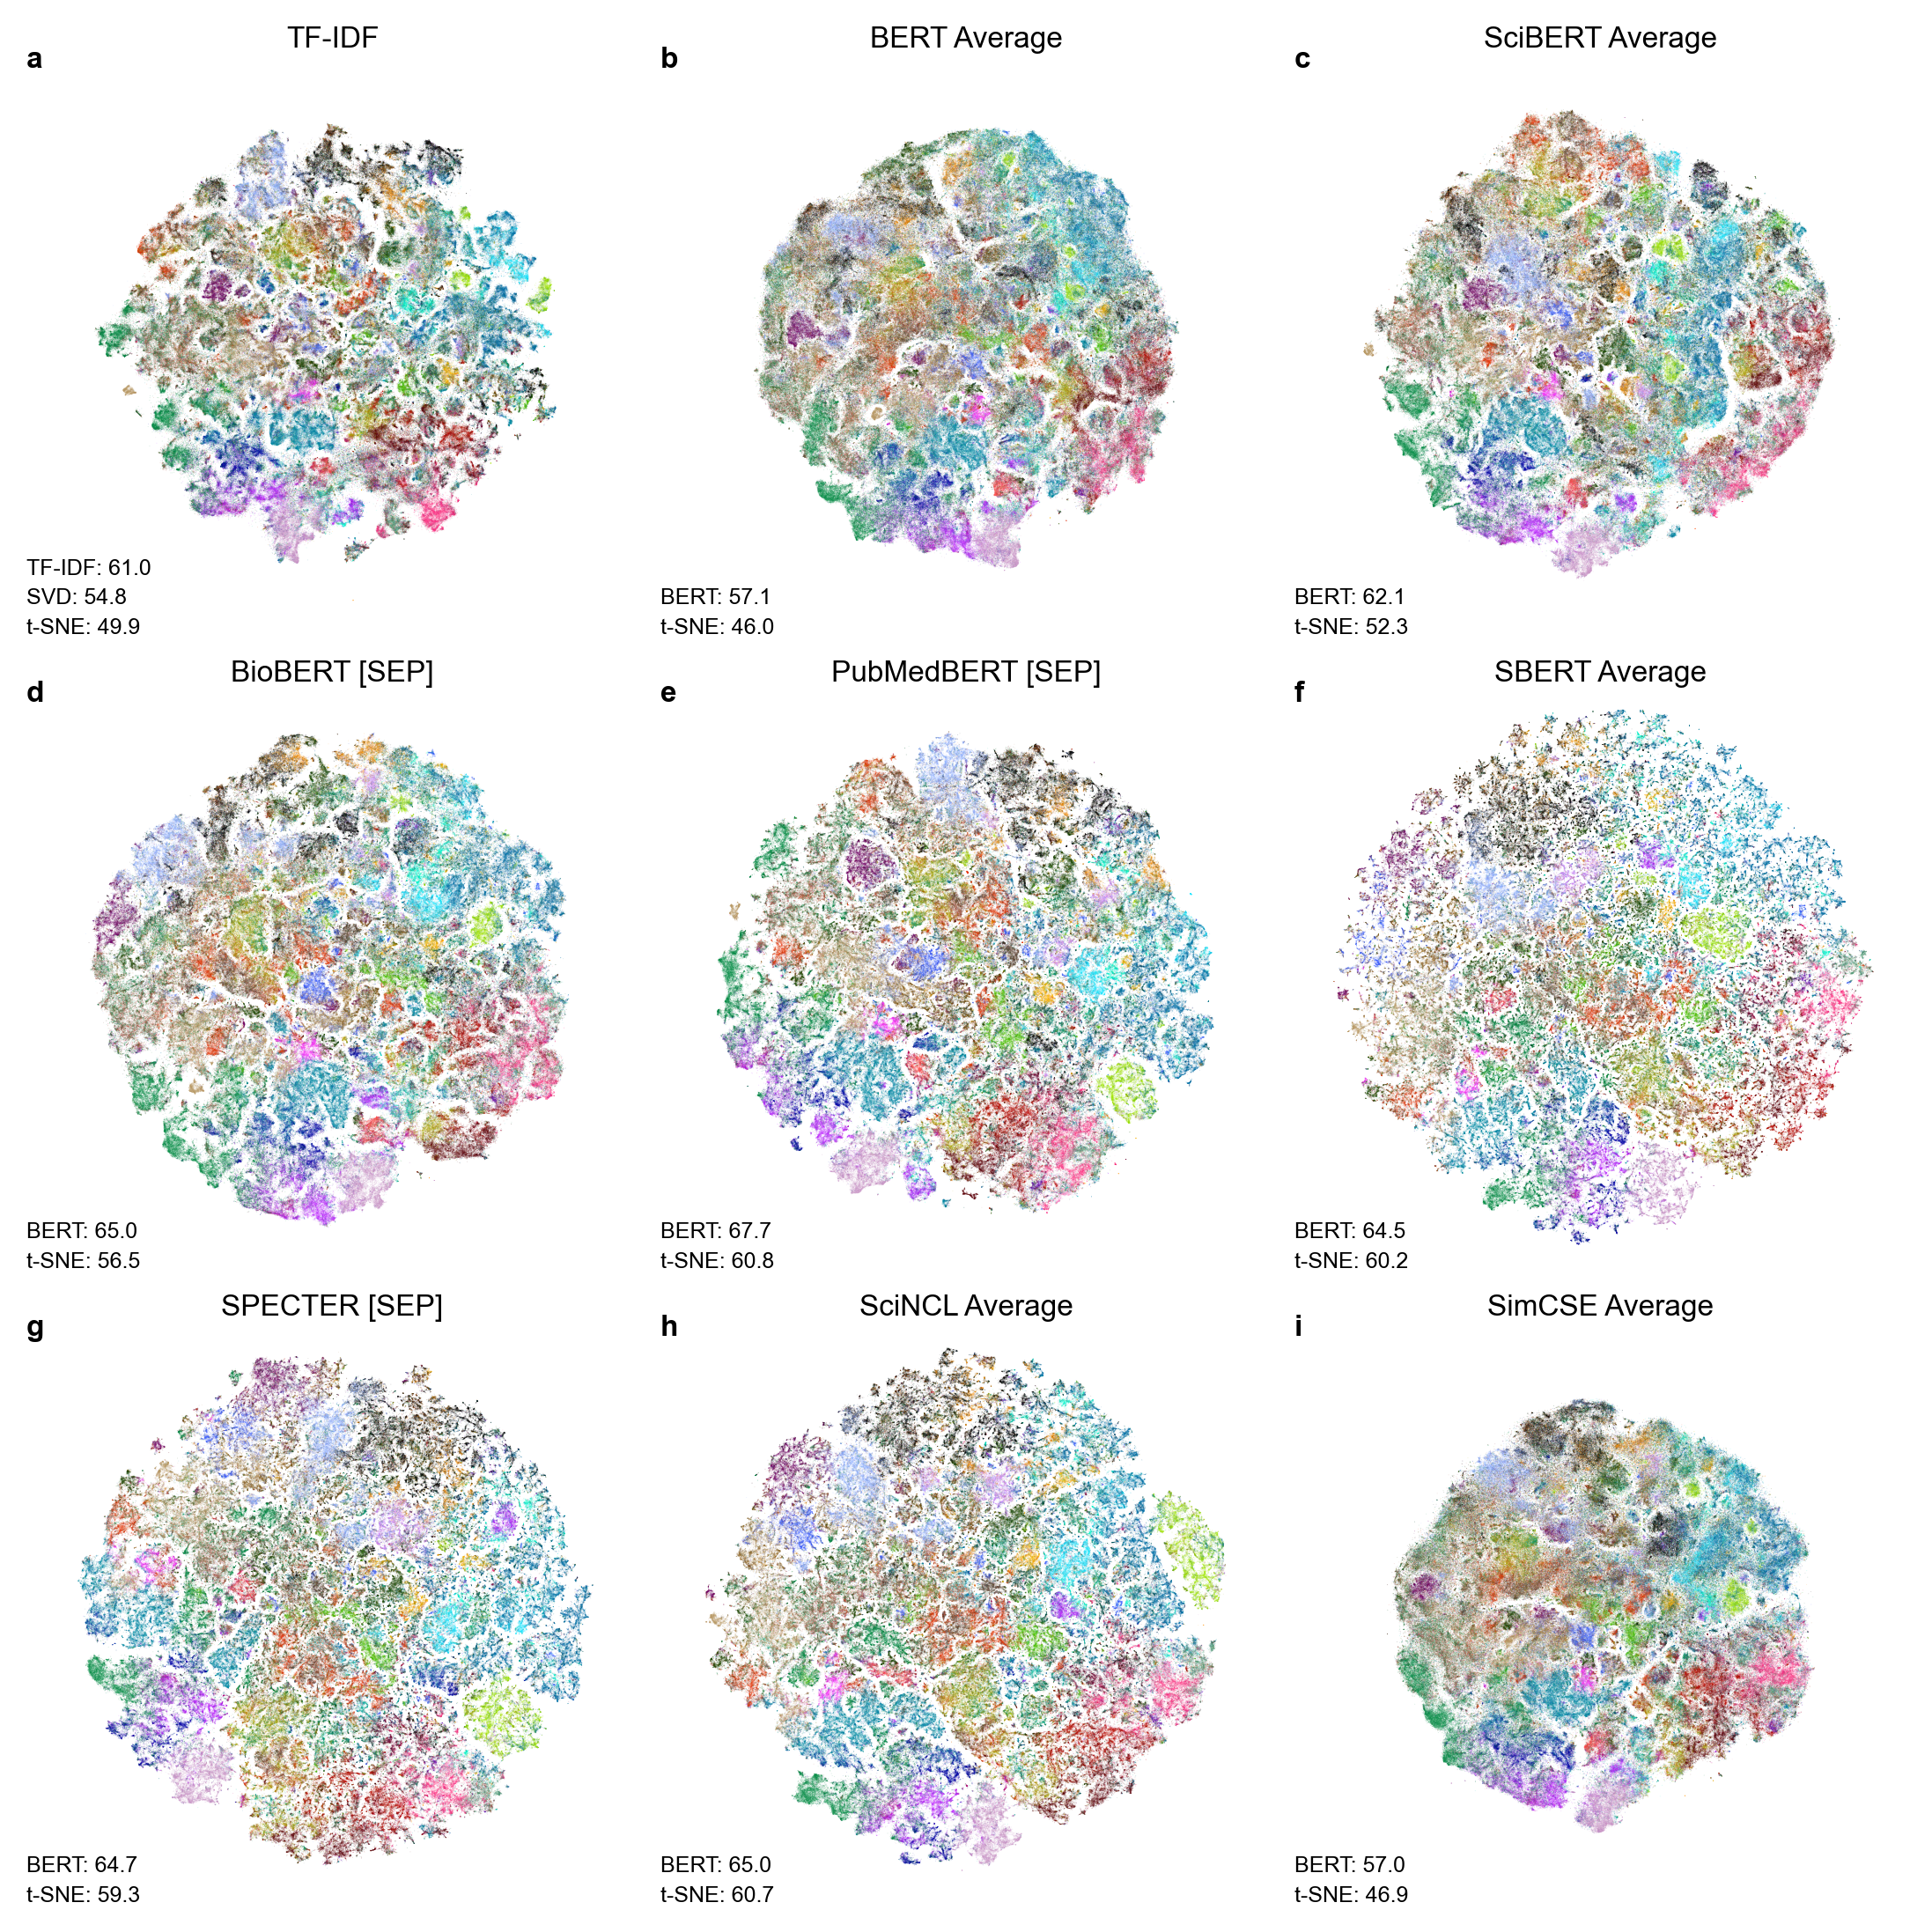

In [9]:
%matplotlib inline
fig, axs = plt.subplots(
    3,
    3,
    figsize=(7.2, 7.2),
    layout="constrained",
    sharey=True,
    dpi=300,
)
models = [
    "tfidf",
    "bert",
    "scibert",
    "biobert",
    "pubmedbert",
    "sbert",
    "specter",
    "scincl",
    "simcse",
]

titles = [
    "TF-IDF",
    "BERT Average",
    "SciBERT Average",
    "BioBERT [SEP]",
    "PubMedBERT [SEP]",
    "SBERT Average",
    "SPECTER [SEP]",
    "SciNCL Average",
    "SimCSE Average",
]
tsne_names = [
    "tsne_tfidf.npy",
    "tsne_bert_embeddings_av.npy",
    "tsne_vec_av_scibert_float.npy",
    "tsne_vec_sep_biobert_float.npy",
    "tsne_pubmedbert_embeddings_sep.npy",
    "tsne_sbert_embeddings_av.npy",
    "tsne_vec_sep_specter_float.npy",
    "tsne_scincl_embeddings_av.npy",
    "tsne_vec_av_simcse_float.npy",
]


txt_kwargs = dict(size=8, weight="bold", va="top", ha="left")
x_lim = (-110, 110)
y_lim = (-110, 110)

for i, ax in enumerate(axs.flat):
    tsne = np.load(variables_path / tsne_names[i])
    if tsne_names[i] in {
        "tsne_scincl_embeddings_av.npy",
        "tsne_vec_sep_biobert_float.npy",
        "tsne_bert_embeddings_av.npy",
    }:
        # flip both axis
        tsne = np.vstack((-tsne[:, 0], -tsne[:, 1])).T

    elif tsne_names[i] in {
        "tsne_pubmedbert_embeddings_sep.npy",
    }:
        # flip x-axis
        tsne = np.vstack((-tsne[:, 0], tsne[:, 1])).T

    elif tsne_names[i] in {
        "tsne_vec_av_simcse_float.npy",
        "tsne_tfidf.npy",
        "tsne_sbert_embeddings_av.npy",
    }:
        # flip y-axis
        tsne = np.vstack((tsne[:, 0], -tsne[:, 1])).T

    elif tsne_names[i] in {"tsne_vec_av_scibert_float.npy"}:
        # rotate
        tsne = np.vstack((tsne[:, 1], tsne[:, 0])).T

    plot_tsne_colors(
        tsne, colors, x_lim=x_lim, y_lim=y_lim, ax=ax, plot_type="subplot_2"
    )
    ax.text(
        0,
        1,
        string.ascii_lowercase[i],
        transform=ax.transAxes,
        **txt_kwargs,
    )
    ax.set_title(titles[i], y=0.98)

    # knn accuracies
    if models[i] == "tfidf":
        ax.text(
            0,
            0.1,
            f"TF-IDF: {dict_accuracies[models[i]][0]}",
            transform=ax.transAxes,
            va="bottom",
            ha="left",
            size=6,
        )

        ax.text(
            0,
            0.05,
            f"SVD: {dict_accuracies[models[i]][1]}",
            transform=ax.transAxes,
            va="bottom",
            ha="left",
            size=6,
        )

        ax.text(
            0,
            0,
            f"t-SNE: {dict_accuracies[models[i]][2]}",
            transform=ax.transAxes,
            va="bottom",
            ha="left",
            size=6,
        )

    else:
        ax.text(
            0,
            0.05,
            f"BERT: {dict_accuracies[models[i]][0]}",
            transform=ax.transAxes,
            va="bottom",
            ha="left",
            size=6,
        )

        ax.text(
            0,
            0,
            f"t-SNE: {dict_accuracies[models[i]][1]}",
            transform=ax.transAxes,
            va="bottom",
            ha="left",
            size=6,
        )

fig.savefig(figures_path / "fig_S8_tsne_BERT_models_1M.png")
fig.savefig(figures_path / "fig_S8_tsne_BERT_models_1M.pdf")